<a href="https://colab.research.google.com/github/jeevanvishwa02/Competitions/blob/main/TAMU_Competition_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Humana believes in a whole person health model that supports physical,
mental and social health, and, ultimately, helps people achieve their best
health. And, we believe in a more equitable health system where social needs
do not determine your health outcomes.


**Health-related social needs (HRSNs)** are the immediate health-harming
conditions affecting a specific individual. These HRSNs are quite often a result
of structural and/or social determinants of health that are in place. HRSN
examples include: food insecurity, transportation barriers, loneliness,
financial strain, and housing insecurity.


**Housing insecurity** is the focus of this year’s case competition and is defined
as the lack of access to quality and safe housing. It may include scenarios
such as lack of affordability, unsafe/overcrowded conditions or frequent
moves. 37.1 million American households are “housing cost-burdened,” and
32.7% of older adult households have severe housing problems. Resulting
health problems can range from allergies to neurological to heart damage.


Using the provided data and potentially supplementing it with public data,
create a model to identify Medicare members most likely to be struggling
with housing insecurity issues and propose solutions that help people
achieving their best health.


Drive Link -https://drive.google.com/drive/folders/1BkKhETpHpzJs7k2jzbkgEl5qHr8Tm7LY?usp=sharing

## Import modules, mount your Google Drive, read data
Set up your environment

In [ ]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data
# on the lefthand side, navigate to your data and copy the path
df = pd.read_csv('/content/drive/MyDrive/TAMU Competition/2022_Competition_Training.csv',low_memory=False)
#df = pd.read_excel('/content/drive/MyDrive/TAMU Competition/Training_sample.xlsx')

In [ ]:
df.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,hi_flag
0,100039218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.08,33511.0,0.0,0.0,0.00,0.0,9.1,NaN,0
1,100042427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,176797.0,0.0,0.0,0.00,0.0,6.8,0.670459,0
2,100055103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,380673.0,0.0,0.0,0.00,0.0,8.3,0.879186,0
3,100074556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,267696.0,0.0,0.0,0.00,0.0,7.3,0.746201,0
4,100079932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,19095.0,0.0,0.0,0.25,0.0,6.9,NaN,0


In [ ]:
df.shape

(48300, 881)

In [ ]:
df.columns

Index(['id', 'rx_hum_19_pmpm_cost', 'cmsd2_can_mal_male_genital_pmpm_ct',
       'cmsd2_inj_surgical_pmpm_ct', 'rev_pm_capd_pmpm_cd_ct',
       'cci_chf_pmpm_ct', 'rx_phar_cat_safeway_pmpm_ct',
       'cmsd2_ext_car_pmpm_ct', 'cmsd2_dig_liver_pmpm_ct',
       'cmsd2_mus_arthropath_pmpm_ct',
       ...
       'cmsd2_ext_nature_pmpm_ct', 'cmsd2_gus_m_genital_pmpm_ct',
       'atlas_totalpopacs', 'cmsd2_neo_neo_other_pmpm_ct',
       'cmsd2_dig_hernia_pmpm_ct', 'cmsd2_sns_blood_pmpm_ct',
       'cmsd2_ext_compl_medical_care_pmpm_ct', 'rwjf_food_env_inx',
       'atlas_snapspth16', 'hi_flag'],
      dtype='object', length=881)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Columns: 881 entries, id to hi_flag
dtypes: float64(817), int64(57), object(7)
memory usage: 324.6+ MB


In [ ]:
#create counts of df for plotting categorical variables using Numpy
hous_insec_class = np.unique(df['hi_flag'], return_counts=True)
print('target_class = {}\n'.format(hous_insec_class))

target_class = (array([0, 1]), array([46182,  2118]))



In [ ]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color': 'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

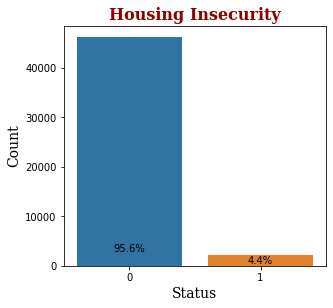

In [ ]:
# Display a frequency distribution for target_class
fig = plt.figure(figsize=[16,15]); # Define figure size and store it in a variable
ax1 = fig.add_subplot(3, 3, 2);    #Use subplot function to create a plot of the size defined
sns.barplot(x=list(hous_insec_class[0]), y=list(hous_insec_class[1]), ax=ax1 ); # Add x labels for bar plot from array defined above. Similarly for y-axis. ax defines which plot the bar should return to
ax1.text(0, 2800, '{}%' .format(str(round(hous_insec_class[1][0]/sum(hous_insec_class[1])*100,1))),  horizontalalignment='center') # Add the text and define where it has to be added (0,2800 defines x and y positions for the text)
ax1.text(1, 500, '{}%' .format(str(round(hous_insec_class[1][1]/sum(hous_insec_class[1])*100,1))),  horizontalalignment='center')  # Add the text
ax1.set_title('Housing Insecurity', fontdict=axtitle_dict); # Set the title
ax1.set_xlabel('Status', fontdict=axlab_dict);  # Set the xlabel
ax1.set_ylabel('Count', fontdict=axlab_dict);         # Set the ylabel
#ax1.bar_label(ax1.containers[0])
plt.show()

## Data Cleaning

### NULL Value Treatment

In [ ]:
#Check for NULL in each column
cnt=0
for i in df.columns:
  if(df[i].isnull().sum().sum()>0):
    print("Column",i,df[i].isnull().sum().sum())
    cnt=cnt+1
print("Number of columns with nulls",cnt)
#df.isnull().sum()

Column rev_pm_capd_pmpm_cd_ct 7
Column cmsd2_ext_car_pmpm_ct 26
Column cmsd2_mus_arthropath_pmpm_ct 45
Column rwjf_homicides_rate 12277
Column rwjf_premature_death_rate 11644
Column cnt_cp_print_0 28
Column rwjf_poor_men_hlth_days 11639
Column total_ip_maternity_admit_days_pmpm 1
Column rx_hum_10_pmpm_ct 46
Column cmsd2_ano_mus_pmpm_ct 91
Column rx_hum_61_pmpm_ct 84
Column cmsd2_inj_burns_int_pmpm_ct 8
Column cmsd2_mus_autoinf_pmpm_ct 6
Column cnt_cp_emails_9 65
Column cmsd2_ext_other_land_transport_pmpm_ct 27
Column dcsi_score 9
Column bh_ambulance_visit_ct_pmpm 52
Column cnt_cp_print_1 10
Column cmsd2_inf_infectious_pmpm_ct 41
Column bh_urgent_care_allowed_pmpm_cost 22
Column credit_bal_nonmtgcredit_60dpd 45173
Column cmsd2_cir_ac_rheum_fever_pmpm_ct 8
Column cmsd2_can_mal_end_pmpm_ct 85
Column rx_hum_37_pmpm_cost 2
Column bh_otic_pmpm_ct 8
Column cmsd2_res_res_postop_pmpm_ct 112
Column cnt_cp_emails_0 38
Column rev_pm_hospc_pmpm_cd_ct 1
Column cmsd2_inj_trauma_pmpm_ct 30
Column rx_h

**NULL Value treatment for Scalar Variables**

1.   Remove the columns which have NULLS poct more than 20% for scalar variables
2.   For others, replace the NULLS with median




In [ ]:
#check nulls for predicted column
a=df['hi_flag'].isnull().sum()
print("There are", a ,"NULLs in the target variable")

There are 0 NULLs in the target variable


In [ ]:
#Step 1 - Remove the columns with more than 20% NULLs

for i in df.describe().columns:
  if(df[i].isnull().sum()/len(df)>0.2):
    df.drop(columns=i,axis=1,inplace=True)

In [ ]:
#Step 2 -Replace NULLs with median for other variables
for i in df.describe().columns:
  df[i].fillna(df[i].median(),inplace=True)    

In [ ]:
# Check for NULLs again
# All these columsn should be categorical variables 
cnt=0
null_catg_cols=[]
for i in df.columns:
  if(df[i].isnull().sum().sum()>0):
    print("Column",i,df[i].isnull().sum().sum())
    null_catg_cols.append(i)
    cnt=cnt+1
print("Number of columns with nulls",cnt)
null_catg_cols

Column cons_mobplus 11150
Column cms_ra_factor_type_cd 2461
Column cons_homstat 11159
Column lang_spoken_cd 18936
Number of columns with nulls 4


['cons_mobplus', 'cms_ra_factor_type_cd', 'cons_homstat', 'lang_spoken_cd']

**NULL Value treatment for Categorical Variables**

1.   Remove the columns with either Unknown or OTH to not drop any releveant information




In [ ]:
#Step 3 - For categorical variables, replace NULLS with Unknown

#Column cons_mobplus 237 - U
#Column cms_ra_factor_type_cd 54 - U
#Column cons_homstat 238 - U
#Column lang_spoken_cd 421 - OTH

for i in null_catg_cols:
  if(i=='lang_spoken_cd'):
    #df[i].isnull().sum()/len(df)>0.2):
    df[i].fillna('OTH',inplace=True)
  else:
    df[i].fillna('U',inplace=True)

In [ ]:
# Check for NULLs again
# No columns should have NULLs
cnt=0
for i in df.columns:
  if(df[i].isnull().sum().sum()>0):
    print("Column",i,df[i].isnull().sum().sum())
    #null_catg_cols.append(i)
    cnt=cnt+1
print("Number of columns with nulls",cnt)


Number of columns with nulls 0


### Outliers Treatment

In [ ]:
#Check for outliers based on standard defintion of 25% and 75% quantiles
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1

((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


atlas_age65andolderpct2010              True
atlas_orchard_farms12                   True
atlas_pct_diabetes_adults13             True
atlas_totalocchu                        True
atlas_totalpopacs                       True
                                        ... 
total_physician_office_ds_clm           True
total_physician_office_visit_ct_pmpm    True
total_urgent_care_allowed_pmpm_cost     True
total_urgent_care_ds_clm                True
total_urgent_care_visit_ct_pmpm         True
Length: 839, dtype: bool

In [ ]:
#Upper and Lower limits using standard definition. This will be used to replace the outlier values if necessary (Based on team's discussion)
dict={}
for col in df.describe().columns:
  percentile75=df[col].quantile(0.75)
  percentile25=df[col].quantile(0.25)
  IQR=percentile75-percentile25
  upper_limit=percentile75+1.5*IQR
  lower_limit=percentile25-1.5*IQR
  dict['upper_limit'+'_'+col]=upper_limit
  dict['lower_limit'+'_'+col]=lower_limit

In [ ]:
#Check a sample
print(dict['lower_limit_rx_hum_32_pmpm_ct'])
print(dict['upper_limit_rx_hum_32_pmpm_ct'])

-0.12
0.2


In [ ]:
#dict
lst=[]
lower_limit=[]
upper_limit=[]
max=[]
min=[]
lqo=[]
uqo=[]
median=[]
mean=[]
for i in df.describe().columns:
  lqo_value=len(df[(df[i]<dict['lower_limit_'+i])])
  uqo_value=len(df[(df[i]>dict['upper_limit_'+i])])
  lst.append(i)
  lqo.append(lqo_value)
  uqo.append(uqo_value)
  lower_limit.append(dict['lower_limit_'+i])
  upper_limit.append(dict['upper_limit_'+i])
  min.append(df[i].min())
  max.append(df[i].max())
  mean.append(df[i].mean())
  median.append(df[i].median())
outlier_df=pd.DataFrame()
outlier_df['lst']=lst
outlier_df['lqo']=lqo
outlier_df['uqo']=uqo
outlier_df['lower_limit']=lower_limit
outlier_df['upper_limit']=upper_limit
outlier_df['min']=min
outlier_df['max']=max
outlier_df['mean']=mean
outlier_df['median']=median
outlier_df.to_csv('outlier_df.csv')

Based on observations, all technical outliers seems valid based on few smaple checks . So no treatment has been given for outliers

## Feature Engineering

### Variable importance 

As there are lot of variables, it is better to filter the important variables using XG Boost or Decision Tree and then explore further 

**Oversampling**

In [ ]:
df2=df.copy()

In [ ]:
df2['hi_flag'].value_counts()/len(df2)

0    0.956149
1    0.043851
Name: hi_flag, dtype: float64

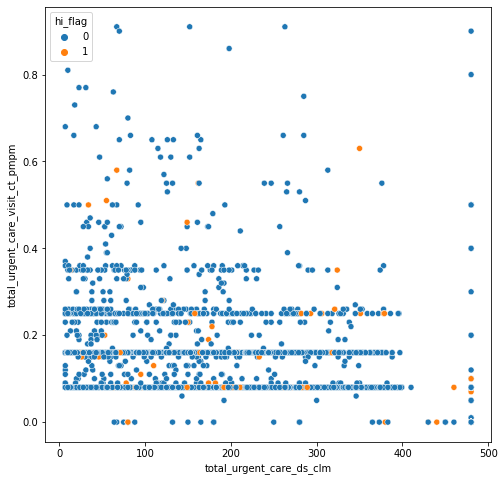

In [ ]:
# Visualize the data
plt.figure(figsize=(8, 8))
sns.scatterplot(x = 'total_urgent_care_ds_clm',y='total_urgent_care_visit_ct_pmpm', hue = 'hi_flag', data = df2)

In [ ]:
catg_columns=['cons_mobplus', 'cms_ra_factor_type_cd', 'cons_homstat', 'cms_orig_reas_entitle_cd', 'sex_cd', 'lang_spoken_cd', 'rucc_category', 'cms_race_cd']
df2 = pd.get_dummies(df, columns=catg_columns, drop_first=True)
df2.head()

y=df2['hi_flag']
X=df2.drop(columns=['hi_flag'])


Over sample the dataset and calculate the variable importance

In [ ]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X, y)
# Check the number of records after over sampling
print(sorted(Counter(y).items()))
print(sorted(Counter(y_train_ros).items()))

[(0, 46182), (1, 2118)]
[(0, 46182), (1, 46182)]


**XG Boost**

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot


In [ ]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train_ros, y_train_ros)
# feature importance
print(model.feature_importances_)


[0.00284787 0.0032149  0.00270438 0.00073319 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00190344 0.00372362 0.00307441 0.00268651
 0.00374841 0.         0.00235424 0.         0.         0.
 0.         0.         0.         0.         0.         0.00428633
 0.         0.         0.         0.00321491 0.         0.
 0.         0.01749751 0.00303843 0.         0.         0.
 0.00442801 0.         0.         0.         0.0011786  0.
 0.         0.         0.00510077 0.00375337 0.         0.
 0.         0.00340172 0.00145585 0.         0.         0.
 0.         0.         0.00300911 0.         0.         0.
 0.         0.0234186  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00275535 0.         0.         0.         0.         0.
 0.00345775 0.00240557 0.         0.00284634 0.         0.
 0.         0.         0.         0.    

In [ ]:
# plot

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

cols=np.array(X.columns)[sorted_idx]
df_features=pd.DataFrame()

df_features['sorted_idx']=sorted_idx
df_features['cols']=cols
df_features['score']=feature_importance[sorted_idx]

In [ ]:
df_features.to_csv('feature_importance.csv')

**SHAP Explainer**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(np.ascontiguousarray(X))
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
# fig = plt.figure(figsize=(12, 6))
# plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
# plt.title('SHAP Importance')

cols=np.array(X.columns)[sorted_idx]
df_shap=pd.DataFrame()
df_shap['sorted_idx']=sorted_idx
df_shap['col']=cols
df_shap['shap_importance']=shap_importance

In [ ]:
df_shap.to_csv('df_shap_values.csv')

Use the XG Boost Feature importance values and SHAP values to relate and finalize the list of variables

### Feature Exploration based on variable importance

**Demographic Variables**

In [ ]:
demo_var=['cons_mobplus', 'cms_ra_factor_type_cd', 'cons_homstat', 'cms_orig_reas_entitle_cd', 'sex_cd', 'lang_spoken_cd', 'rucc_category', 'cms_race_cd','hi_flag']
#demo_var

In [ ]:
ind=[]
ind.append(0)  #creating id column
col=list(df.columns)
for i in demo_var:
  ind.append(col.index(i))
ind

[0, 236, 332, 362, 380, 548, 554, 639, 722, 838]

In [ ]:
df_demo_var=df.iloc[:,ind]
df_demo_var.head()

,id,cons_mobplus,cms_ra_factor_type_cd,cons_homstat,cms_orig_reas_entitle_cd,sex_cd,lang_spoken_cd,rucc_category,cms_race_cd,hi_flag
0,100039218.0,M,CN,R,0.0,M,ENG,3-Metro,1,0
1,100042427.0,M,CN,Y,0.0,F,ENG,1-Metro,6,0
2,100055103.0,S,CN,U,0.0,F,OTH,2-Metro,1,0
3,100074556.0,U,CF,U,0.0,F,OTH,2-Metro,2,0
4,100079932.0,U,CP,U,1.0,M,OTH,5-Nonmetro,1,0


<Figure size 1152x864 with 0 Axes>

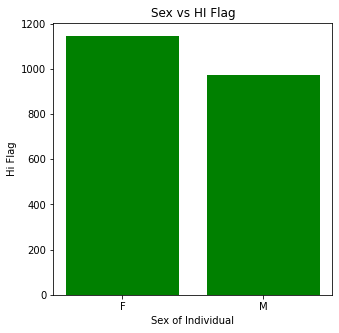

In [ ]:
fig=plt.figure(figsize=[16,12])

hyp=df_demo_var[df_demo_var['hi_flag']==1].groupby(['sex_cd'],as_index=False).count()
x=hyp['sex_cd']
y=hyp['hi_flag']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(5,5))
plt.bar(x_pos, y, color='green')
plt.xlabel("Sex of Individual")
plt.ylabel("Hi Flag")
plt.title("Sex vs HI Flag")

plt.xticks(x_pos, x)
plt.show()

In [ ]:
df_demo_var.head()

,id,cons_mobplus,cms_ra_factor_type_cd,cons_homstat,cms_orig_reas_entitle_cd,sex_cd,lang_spoken_cd,rucc_category,cms_race_cd,hi_flag
0,100039218.0,M,CN,R,0.0,M,ENG,3-Metro,1,0
1,100042427.0,M,CN,Y,0.0,F,ENG,1-Metro,6,0
2,100055103.0,S,CN,U,0.0,F,OTH,2-Metro,1,0
3,100074556.0,U,CF,U,0.0,F,OTH,2-Metro,2,0
4,100079932.0,U,CP,U,1.0,M,OTH,5-Nonmetro,1,0


In [ ]:
df_demo_var['rucc_category'].unique()

array(['3-Metro', '1-Metro', '2-Metro', '5-Nonmetro', '4-Nonmetro',
       '6-Nonmetro', '7-Nonmetro', '8-Nonmetro', '9-Nonmetro'],
      dtype=object)

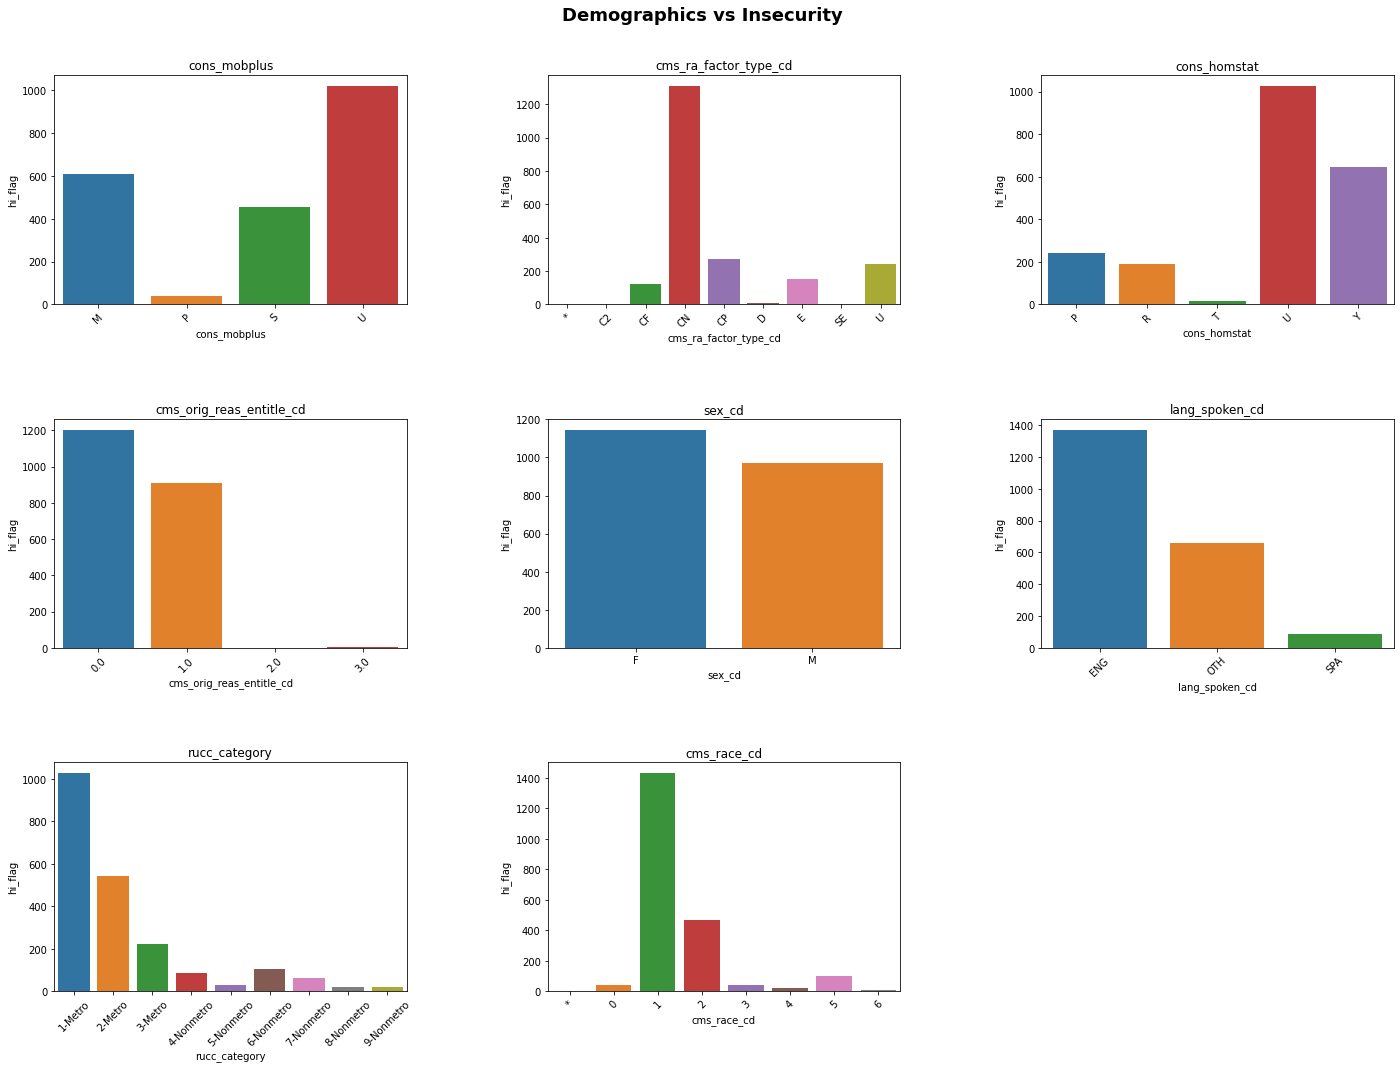

In [ ]:
fig=plt.figure(figsize=[24,16])
fig.suptitle('Demographics vs Insecurity',fontsize=18,fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5,wspace=0.4)
# demo_var.remove('hi_flag')
df_demo_var.columns
for i in range(len(demo_var)-1):
  hi=df_demo_var[df_demo_var['hi_flag']==1]
  no_hi=df_demo_var[df_demo_var['hi_flag']==0]
  hyp=hi.groupby([demo_var[i]],as_index=False).count()
  hyp2=df_demo_var.groupby([demo_var[i]],as_index=False).count()
  #x=hyp[demo_var[i]]/hyp2[demo_var[i]]
  y=hyp['hi_flag']
  ax1=fig.add_subplot(3,3,i+1)
  ax1=sns.barplot(data=hyp, x=demo_var[i], y="hi_flag")
  ax1.set_title(f'{demo_var[i]}')
  ax1.set_xlabel(f'{demo_var[i]}')
  #locs, labels = plt.xticks()
  #plt.setp(labels, rotation=45)
  if(len(df_demo_var[demo_var[i]].unique())>3):
    plt.setp(ax1.get_xticklabels(), rotation=45)
  #ax1.set_xticklabels(rotation=30) 

### **Final List of Variables**

Based on SHAP and XG Boost Variable importance values

In [ ]:
variables_df=pd.read_csv('/content/drive/MyDrive/TAMU Competition/important_features.csv')

In [ ]:
variables_df.head()

,Column name,SHAP,XG booster Feature Importance,Feature Description
0,cons_homstat_Y,0.0,0.05385,NaN
1,cms_disabled_ind,0.0,0.02342,Binary indicator that a Medicare Supplement me...
2,cms_ra_factor_type_cd_CN,0.0,0.02127,NaN
3,total_outpatient_visit_ct_pmpm,0.0,0.01750,visits per month for overall claims related to...
4,cms_low_income_ind,0.0,0.01380,Binary indicator that a member is receiving a ...


In [ ]:
variables_df.shape

(89, 4)

In [ ]:
variables_df.columns

Index(['Column name', 'SHAP', 'XG booster Feature Importance',
       'Feature Description'],
      dtype='object')

In [ ]:
#change the column names
variables_df.columns=['column_name', 'SHAP', 'XG_booster_Feature_Importance',
       'Feature_Description']

In [ ]:
var_list=list(variables_df['column_name'])

## Data Preparation for Model

In [ ]:
#append hi_flag column to the dataset

In [ ]:
var_list.append('hi_flag')

In [ ]:
print(var_list)

['cons_homstat_Y', 'cms_disabled_ind', 'cms_ra_factor_type_cd_CN', 'total_outpatient_visit_ct_pmpm', 'cms_low_income_ind', 'total_physician_office_allowed_pmpm_cost', 'total_physician_office_visit_ct_pmpm', 'med_physician_office_ds_clm', 'cmsd1_men_pmpm_ct', 'cmsd2_skn_radiation_pmpm_ct', 'cons_mobplus_U', 'cms_frailty_ind', 'est_age', 'cms_orig_reas_entitle_cd_1.0', 'rev_pm_ivtrp_pmpm_cd_ct', 'med_outpatient_ds_clm', 'cms_ra_factor_type_cd_E', 'rev_pm_raddia_pmpm_cd_ct', 'total_outpatient_ds_clm', 'rev_pm_asc_pmpm_cd_ct', 'rx_nonmail_pmpm_ct', 'atlas_totalocchu', 'cms_race_cd_1', 'rx_days_since_last_script', 'rx_hum_75_pmpm_ct', 'cnt_cp_emails_10', 'rx_tier_2_pmpm_ct', 'rx_maint_pmpm_cost', 'total_bh_allowed_pmpm_cost', 'total_med_allowed_pmpm_cost', 'bh_ip_snf_allowed_pmpm_cost', 'total_ip_ltach_admit_days_pmpm', 'rx_hum_50_pmpm_cost', 'cnt_cp_vat_5', 'cmsd1_skn_pmpm_ct', 'rx_hum_31_pmpm_ct', 'cmsd2_skn_papulosquamous_pmpm_ct', 'cnt_cp_vat_pmpm_ct', 'cmsd2_bld_hemorrhagic_pmpm_ct', '

In [ ]:
final_df=df2[var_list]

In [ ]:
final_df.shape

(48300, 90)

### Over Sampling the dataset

In [ ]:
final_df2=final_df.copy()

In [ ]:
final_df['hi_flag'].value_counts()/len(final_df)

0    0.956149
1    0.043851
Name: hi_flag, dtype: float64

In [ ]:
y=final_df['hi_flag']
X=final_df.drop(columns=['hi_flag'])


**Data Splitting**

Split the dataset into Train and Test

In [ ]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The test dataset has {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 38640
The number of records in the test dataset is 9660
The training dataset has 36929 records for the majority class and 1711 records for the minority class.
The test dataset has 9253 records for the majority class and 407 records for the minority class.


**Over sampling** 

In [ ]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y).items()))
print(sorted(Counter(y_train_ros).items()))

[(0, 46182), (1, 2118)]
[(0, 36929), (1, 36929)]


## Data Modeling

### Standardizing data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [ ]:
sc = StandardScaler()
sc.fit(X_train_ros)
X_train_std = sc.transform(X_train_ros)
X_test_std = sc.transform(X_test)

### Evaluate Model Function

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Baseline Model - Random Forest

No oversampling

In [ ]:
# Train the random forest model , below results are without oversampling
brf = RandomForestClassifier()
baseline_model = brf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
#print(classification_report(y_test, baseline_prediction))

In [ ]:
#Evaluate the Model
brf_eval=evaluate_model(brf, X_test_std, y_test)

# Print result
print('Accuracy:', brf_eval['acc'])
print('Precision for Housing Insecurity:', brf_eval['prec'])
print('Recall for Housing Insecurity:', brf_eval['rec'])   #For 1
print('F1 Score:', brf_eval['f1'])
print('Cohens Kappa Score:', brf_eval['kappa'])
print('Area Under Curve:', brf_eval['auc'])
print('Confusion Matrix:\n', brf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Accuracy: 0.9501035196687371
Precision for Housing Insecurity: 0.07865168539325842
Recall for Housing Insecurity: 0.0171990171990172
F1 Score: 0.028225806451612902
Cohens Kappa Score: 0.013306875268334961
Area Under Curve: 0.6251331993793897
Confusion Matrix:
 [[9171   82]
 [ 400    7]]


### Random Forest

Using oversampling

In [ ]:
# Train the random forest model , below results are without oversampling
rf = RandomForestClassifier()
rf_ros = rf.fit(X_train_std, y_train_ros)
rf_ros_prediction = rf_ros.predict(X_test)
# Check the model performance
#print(classification_report(y_test, rf_ros_prediction))

X has feature names, but RandomForestClassifier was fitted without feature names


In [ ]:
#Evaluate the Model
rf_eval=evaluate_model(rf, X_test_std, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision for Housing Insecurity:', rf_eval['prec'])
print('Recall for Housing Insecurity:', rf_eval['rec'])   #For 1
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.9576604554865424
Precision for Housing Insecurity: 0.25
Recall for Housing Insecurity: 0.002457002457002457
F1 Score: 0.0048661800486618
Cohens Kappa Score: 0.004049403529716611
Area Under Curve: 0.6985317996341449
Confusion Matrix:
 [[9250    3]
 [ 406    1]]


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Building the Model

lr= LogisticRegression()
lr.fit(X_train_std, y_train_ros)

LogisticRegression()

In [ ]:
#Evaluate the Model
lr_eval=evaluate_model(lr, X_test_std, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision for Housing Insecurity:', lr_eval['prec'])
print('Recall for Housing Insecurity:', lr_eval['rec'])   #For 1
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6822981366459627
Precision for Housing Insecurity: 0.08380237648530331
Recall for Housing Insecurity: 0.6584766584766585
F1 Score: 0.14868238557558947
Cohens Kappa Score: 0.07990372031668169
Area Under Curve: 0.7336485065870131
Confusion Matrix:
 [[6323 2930]
 [ 139  268]]


In [ ]:
#From chaitanya's code
print('Recall score is', recall_score(y_test, lr.predict(X_test_std), average='micro'))
print('Precision score is',precision_score(y_test, lr.predict(X_test_std), average='macro'))

Recall score is 0.6822981366459627
Precision score is 0.5311460040891388


In [ ]:
#Confirmation for above function
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80      9253
           1       0.08      0.66      0.15       407

    accuracy                           0.68      9660
   macro avg       0.53      0.67      0.48      9660
weighted avg       0.94      0.68      0.78      9660



### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train_std, y_train_ros)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
#Evaluate the Model
dt_eval=evaluate_model(dt, X_test_std, y_test)

# Print result
print('Accuracy:', round(dt_eval['acc'],3))
print('Precision for Housing Insecurity:', round(dt_eval['prec'],2))
print('Recall for Housing Insecurity:', round(dt_eval['rec'],2))   #For 1
print('F1 Score:', round(dt_eval['f1'],2))
print('Cohens Kappa Score:', round(dt_eval['kappa'],2))
print('Area Under Curve:', round(dt_eval['auc'],2))
print('Confusion Matrix:\n', dt_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.574
Precision for Housing Insecurity: 0.07
Recall for Housing Insecurity: 0.71
F1 Score: 0.12
Cohens Kappa Score: 0.05
Area Under Curve: 0.67
Confusion Matrix:
 [[5254 3999]
 [ 120  287]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, dt.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.98      0.57      0.72      9253
           1       0.07      0.71      0.12       407

    accuracy                           0.57      9660
   macro avg       0.52      0.64      0.42      9660
weighted avg       0.94      0.57      0.69      9660



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train_ros)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evaluate the Model
knn_eval=evaluate_model(knn, X_test_std, y_test)

# Print result
print('Accuracy:', round(knn_eval['acc'],3))
print('Precision for Housing Insecurity:', round(knn_eval['prec'],2))
print('Recall for Housing Insecurity:', round(knn_eval['rec'],2))   #For 1
print('F1 Score:', round(knn_eval['f1'],2))
print('Cohens Kappa Score:', round(knn_eval['kappa'],2))
print('Area Under Curve:', round(knn_eval['auc'],2))
print('Confusion Matrix:\n', knn_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.836
Precision for Housing Insecurity: 0.07
Recall for Housing Insecurity: 0.24
F1 Score: 0.11
Cohens Kappa Score: 0.05
Area Under Curve: 0.57
Confusion Matrix:
 [[7978 1275]
 [ 310   97]]


### XG Boost

In [ ]:
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train_std, y_train_ros)
# feature importance
#print(model.feature_importances_)

XGBClassifier()

In [ ]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for Housing Insecurity:', round(xg_eval['prec'],2))
print('Recall for Housing Insecurity:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('Confusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.705
Precision for Housing Insecurity: 0.09
Recall for Housing Insecurity: 0.64
F1 Score: 0.15
Cohens Kappa Score: 0.09
Area Under Curve: 0.73
Confusion Matrix:
 [[6547 2706]
 [ 147  260]]


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


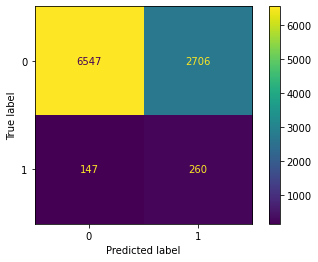

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg, X_test_std, y_test) 

In [ ]:
print("Sensitivity of above model",260/(260+147))

Sensitivity of above model 0.6388206388206388


In [ ]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_importance)

In [ ]:
features =X_test.columns

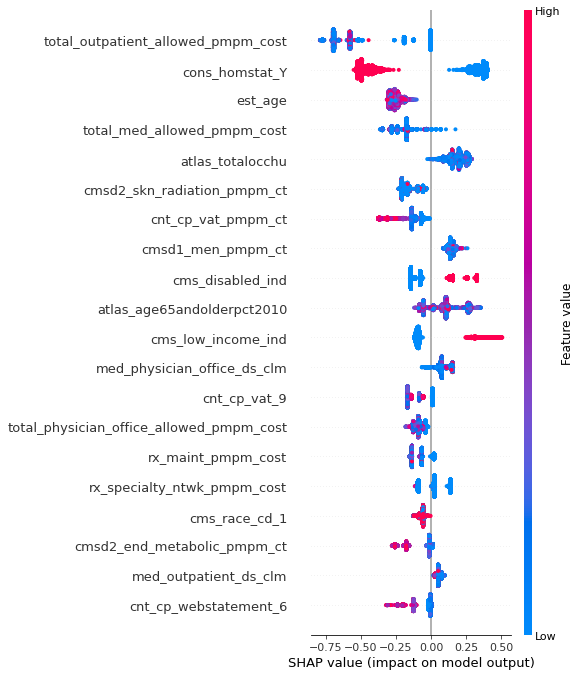

In [ ]:
shap.summary_plot(shap_values, X_importance,feature_names=features)

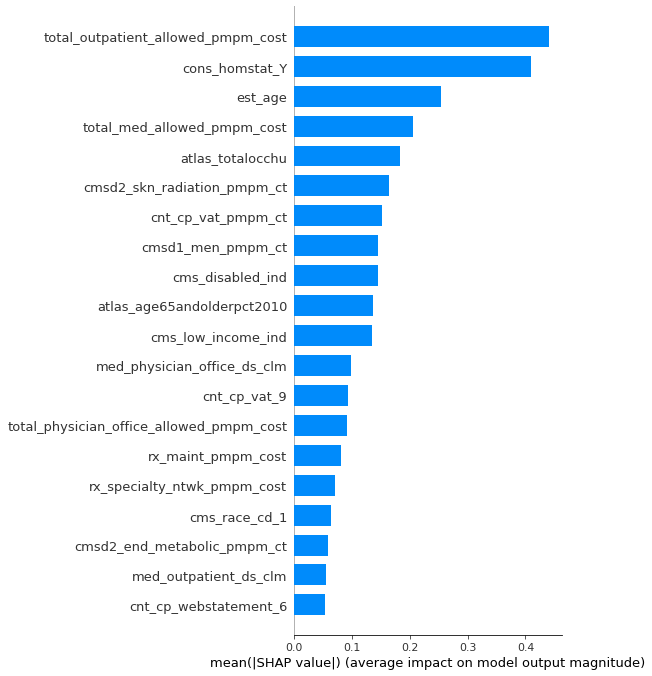

In [ ]:
shap.summary_plot(shap_values, X_importance, plot_type='bar',feature_names=features)

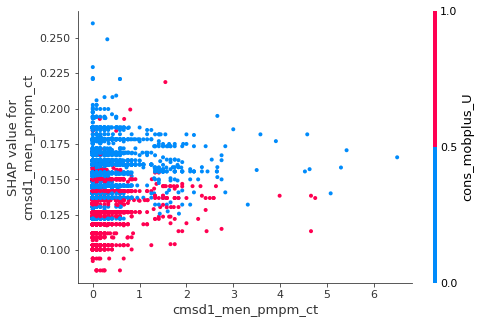

In [ ]:
shap.dependence_plot('cmsd1_men_pmpm_ct', shap_values,X_test)

## Model Evaluation and Comparison

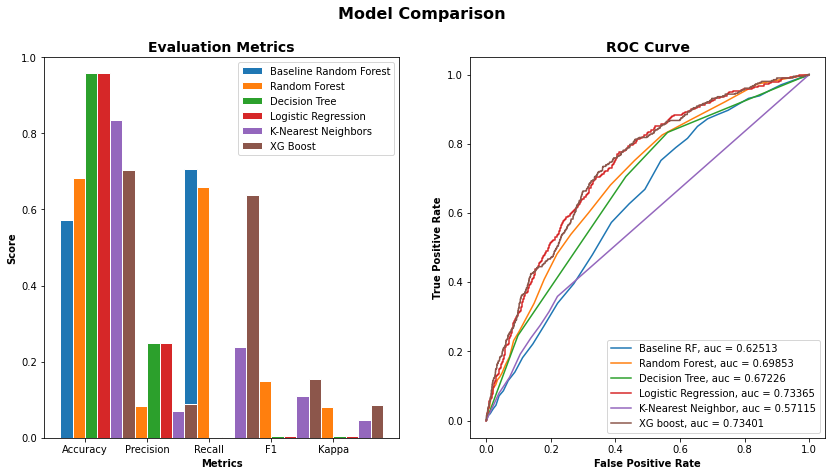

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
brf_score = [brf_eval['acc'], brf_eval['prec'], brf_eval['rec'], brf_eval['f1'], brf_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Baseline Random Forest')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r4, rf_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='XG Boost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(brf_eval['fpr'], brf_eval['tpr'], label='Baseline RF, auc = {:0.5f}'.format(brf_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XG boost, auc = {:0.5f}'.format(xg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [ ]:
def plot_lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

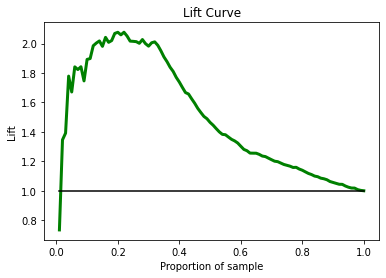

In [ ]:
plot_lift_curve(y_test, lr.predict(X_test_std),)

## Scoring on Holdout Sample

In [ ]:
score_df_raw = pd.read_csv('/content/drive/MyDrive/TAMU Competition/2022_Competition_Holdout.csv',low_memory=False)

In [ ]:
catg_columns=['cons_mobplus', 'cms_ra_factor_type_cd', 'cons_homstat', 'cms_orig_reas_entitle_cd', 'sex_cd', 'lang_spoken_cd', 'rucc_category', 'cms_race_cd']
score_df = pd.get_dummies(score_df_raw, columns=catg_columns, drop_first=True)


In [ ]:
X.columns

Index(['cons_homstat_Y', 'cms_disabled_ind', 'cms_ra_factor_type_cd_CN',
       'total_outpatient_visit_ct_pmpm', 'cms_low_income_ind',
       'total_physician_office_allowed_pmpm_cost',
       'total_physician_office_visit_ct_pmpm', 'med_physician_office_ds_clm',
       'cmsd1_men_pmpm_ct', 'cmsd2_skn_radiation_pmpm_ct', 'cons_mobplus_U',
       'cms_frailty_ind', 'est_age', 'cms_orig_reas_entitle_cd_1.0',
       'rev_pm_ivtrp_pmpm_cd_ct', 'med_outpatient_ds_clm',
       'cms_ra_factor_type_cd_E', 'rev_pm_raddia_pmpm_cd_ct',
       'total_outpatient_ds_clm', 'rev_pm_asc_pmpm_cd_ct',
       'rx_nonmail_pmpm_ct', 'atlas_totalocchu', 'cms_race_cd_1',
       'rx_days_since_last_script', 'rx_hum_75_pmpm_ct', 'cnt_cp_emails_10',
       'rx_tier_2_pmpm_ct', 'rx_maint_pmpm_cost', 'total_bh_allowed_pmpm_cost',
       'total_med_allowed_pmpm_cost', 'bh_ip_snf_allowed_pmpm_cost',
       'total_ip_ltach_admit_days_pmpm', 'rx_hum_50_pmpm_cost', 'cnt_cp_vat_5',
       'cmsd1_skn_pmpm_ct', 'rx_hum_3

In [ ]:
sc = StandardScaler()
sc.fit(score_df[X.columns].fillna(0))
score_df_std = sc.transform(score_df[X.columns].fillna(0))

In [ ]:
#holdout_pred = lr.predict(score_df_std)
holdout_pred_prob = lr.predict_proba(score_df_std)[::,1]

In [ ]:
#holdout_pred = lr.predict(score_df_std)
print(holdout_pred_prob)

[0.23807764 0.77152891 0.44385074 ... 0.29331815 0.50451107 0.76009928]


In [ ]:
df_submission_lb=score_df.copy()

In [ ]:
df_submission_lb['score']=holdout_pred_prob

In [ ]:
df_submission_lb[['id','score']].to_csv('2022CaseCompetition_akshayraj_pallerla_20221013.csv')

## Data Exploration - Post Modeling

Variables are divided into following categories for better business interpretation. Analysis is performed in Tableau workbook